In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
train = pd.read_csv('../input/tabular-playground-series-aug-2021/train.csv')
test = pd.read_csv('../input/tabular-playground-series-aug-2021/test.csv')
sub = pd.read_csv('../input/tabular-playground-series-aug-2021/sample_submission.csv')

# **1.Basic EDA**

In [4]:
# Visualize the training set
train.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
0,0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,...,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,...,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,...,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,...,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,...,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


In [5]:
# Visualize the test set
test.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,250000,0.812665,15,-1.239120,-0.893251,295.5770,15.87120,23.04360,0.942256,29.898000,...,0.446389,-422.332,-1.44630,1.69075,1.059300,-3.010570,1.94664,0.529470,1.386950,8.78767
1,250001,0.190344,131,-0.501361,0.801921,64.8866,3.09703,344.80500,0.807194,38.421900,...,0.377179,10352.200,21.06270,1.84351,0.251895,4.440570,1.90309,0.248534,0.863881,11.79390
2,250002,0.919671,19,-0.057382,0.901419,11961.2000,16.39650,273.24000,-0.003300,37.940000,...,0.990140,3224.020,-2.25287,1.55100,-0.559157,17.838600,1.83385,0.931796,2.336870,9.05400
3,250003,0.860985,19,-0.549509,0.471799,7501.6000,2.80698,71.08170,0.792136,0.395235,...,1.396880,9689.760,14.77150,1.41390,0.329272,0.802437,2.23251,0.893348,1.359470,4.84833
4,250004,0.313229,89,0.588509,0.167705,2931.2600,4.34986,1.57187,1.118300,7.754630,...,0.862502,2693.350,44.18050,1.58020,-0.191021,26.253000,2.68238,0.361923,1.532800,3.70660


In [6]:
print("Training data shape:",train.shape)
print("Test data shape:",test.shape)

Training data shape: (250000, 102)
Test data shape: (150000, 101)


In [7]:
#checking for null values
print(train.isna().sum().sum())
print(test.isna().sum().sum())

0
0


The ID column in both training and test set is innecesary.

In [8]:
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

In [9]:
cols = train.columns.tolist()

## Plotting the distribution of each feature

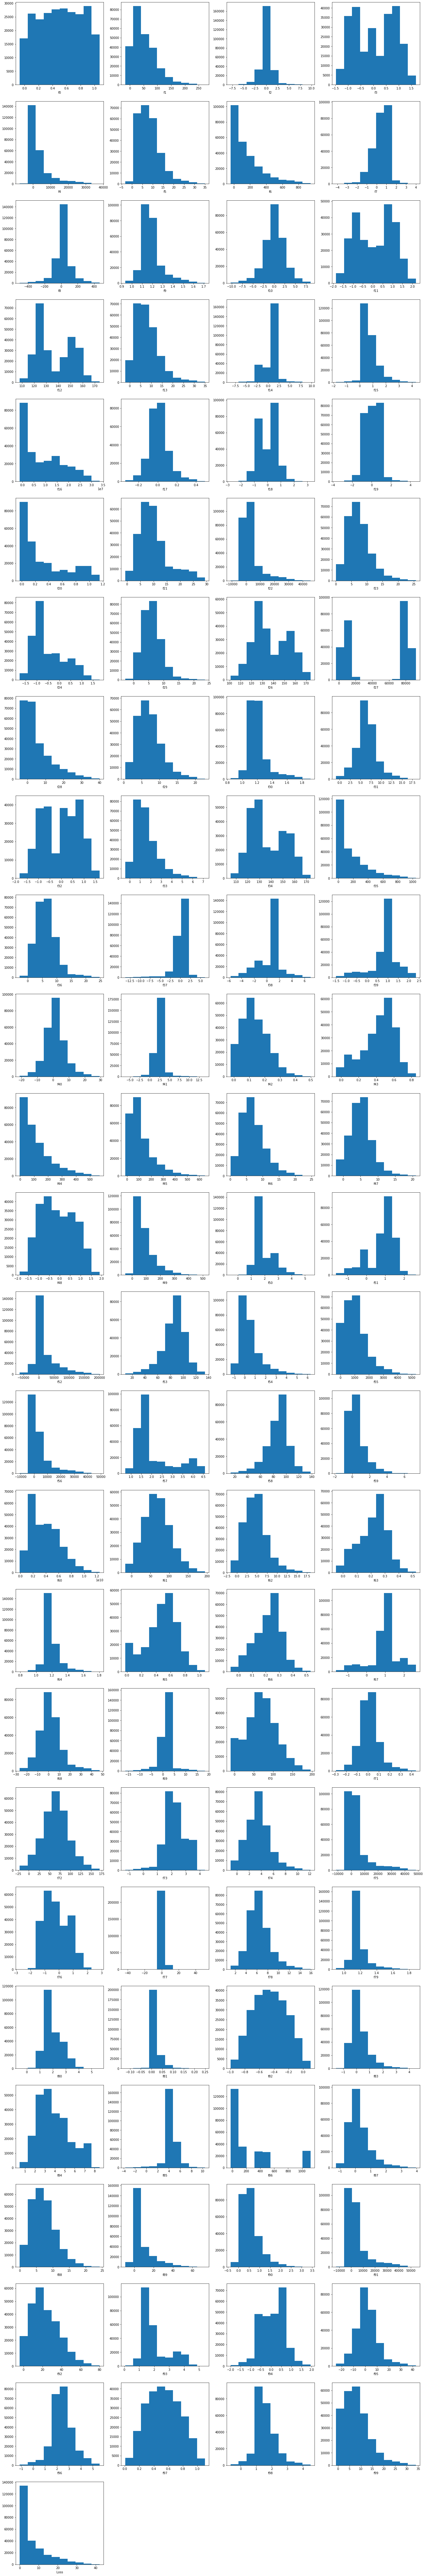

In [10]:
plt.figure(figsize=(24, 156))
for i in range(len(train.columns.tolist())):
    plt.subplot(26, 4, i+1)
    if i <= 99:
        plt.hist(train[f'f{i}'])
        plt.xlabel(f'f{i}')
    else:
        plt.hist(train['loss'])
        plt.xlabel('Loss')
plt.show()

We can see that all the features are continuous and there is no discrete values.

## Plotting the correlation matrix

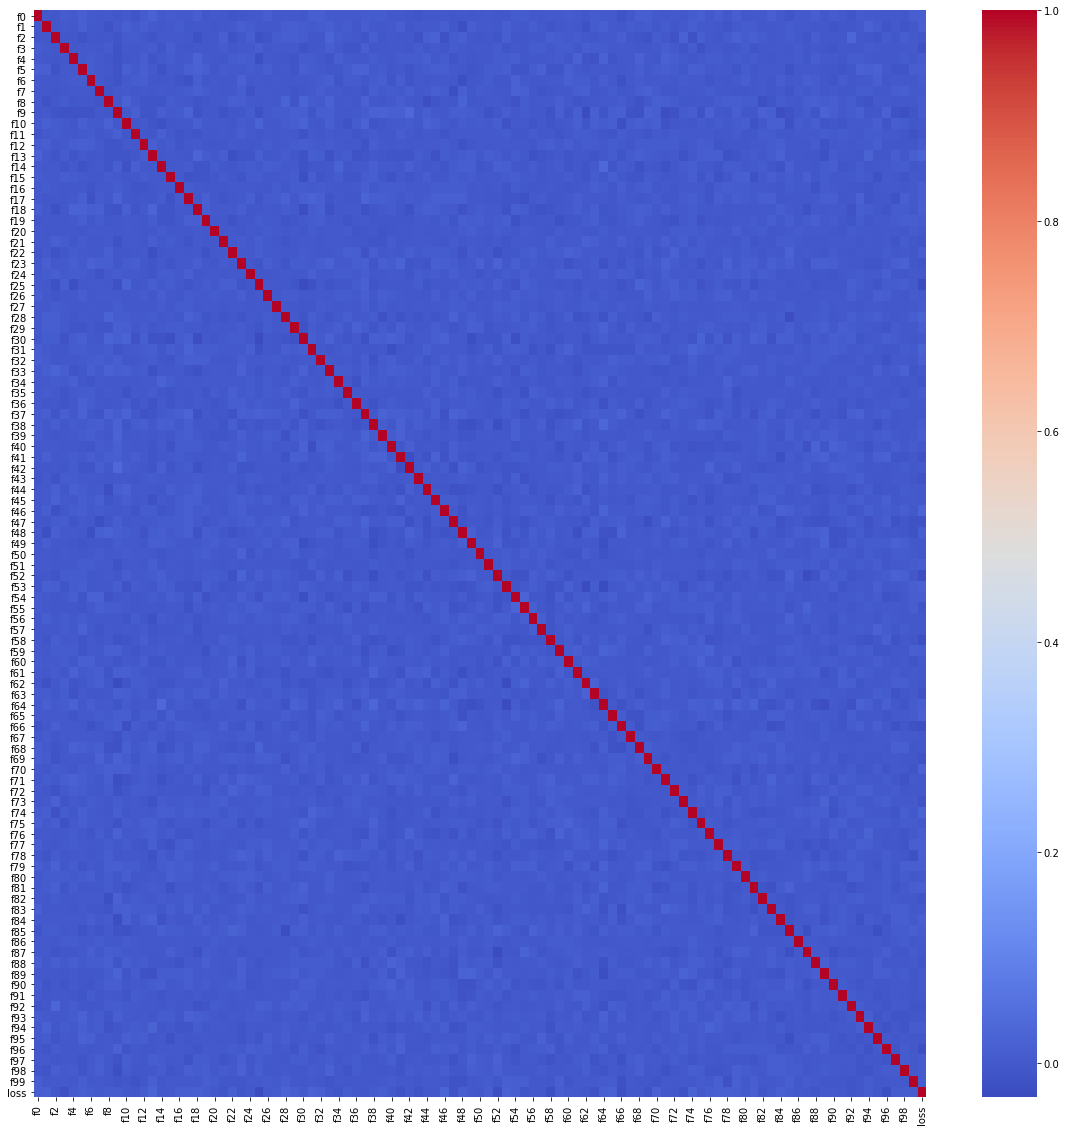

In [14]:
corr = train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot = False, cmap= 'coolwarm')
plt.show()

We can see that relationship between the features and loss is very low.

## Data preparation

In [15]:
print("Training data shape after droping ID colunmn:",train.shape)
print("Test data shape after droppig ID column:",test.shape)

Training data shape after droping ID colunmn: (250000, 101)
Test data shape after droppig ID column: (150000, 100)


In [16]:
cols = test.columns

In [17]:
X = train[cols]
y = train['loss']
test = test

In [18]:
X.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,1.09101,...,0.376622,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980
1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,1.28138,...,0.147973,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383
2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,1.24210,...,0.335985,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550
3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,1.09130,...,0.336490,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880
4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,1.10151,...,0.528518,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197


In [19]:
test.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,0.812665,15,-1.239120,-0.893251,295.5770,15.87120,23.04360,0.942256,29.898000,1.11394,...,0.446389,-422.332,-1.44630,1.69075,1.059300,-3.010570,1.94664,0.529470,1.386950,8.78767
1,0.190344,131,-0.501361,0.801921,64.8866,3.09703,344.80500,0.807194,38.421900,1.09695,...,0.377179,10352.200,21.06270,1.84351,0.251895,4.440570,1.90309,0.248534,0.863881,11.79390
2,0.919671,19,-0.057382,0.901419,11961.2000,16.39650,273.24000,-0.003300,37.940000,1.15222,...,0.990140,3224.020,-2.25287,1.55100,-0.559157,17.838600,1.83385,0.931796,2.336870,9.05400
3,0.860985,19,-0.549509,0.471799,7501.6000,2.80698,71.08170,0.792136,0.395235,1.20157,...,1.396880,9689.760,14.77150,1.41390,0.329272,0.802437,2.23251,0.893348,1.359470,4.84833
4,0.313229,89,0.588509,0.167705,2931.2600,4.34986,1.57187,1.118300,7.754630,1.16807,...,0.862502,2693.350,44.18050,1.58020,-0.191021,26.253000,2.68238,0.361923,1.532800,3.70660


In [20]:
y.head()

0    15
1     3
2     6
3     2
4     1
Name: loss, dtype: int64

In [21]:
#scaling the data 
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
test_scaled = ss.fit_transform(test)

# Model training

## Neural Network Model

Import libraries

In [23]:
import tensorflow as tf
from tensorflow import keras

We create the model

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024,input_dim=X_scaled.shape[1],kernel_initializer='normal',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='relu')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              103424    
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3

Set the optimizer and loss

In [25]:
adam = tf.keras.optimizers.Adam()
model.compile(loss='mean_squared_error',optimizer=adam)

Training

In [26]:
history = model.fit(X_scaled,y,validation_split=0.25,epochs=5,verbose=1,shuffle=True)

Epoch 1/5
5860/5860 [==============================] - 28s 4ms/step - loss: 65.6007 - val_loss: 63.3858
Epoch 2/5
5860/5860 [==============================] - 26s 5ms/step - loss: 62.1388 - val_loss: 63.3835
Epoch 3/5
5860/5860 [==============================] - 26s 4ms/step - loss: 62.7033 - val_loss: 63.3332
Epoch 4/5
5860/5860 [==============================] - 25s 4ms/step - loss: 62.4652 - val_loss: 63.0328
Epoch 5/5
5860/5860 [==============================] - 27s 5ms/step - loss: 61.9500 - val_loss: 63.1261


# Results

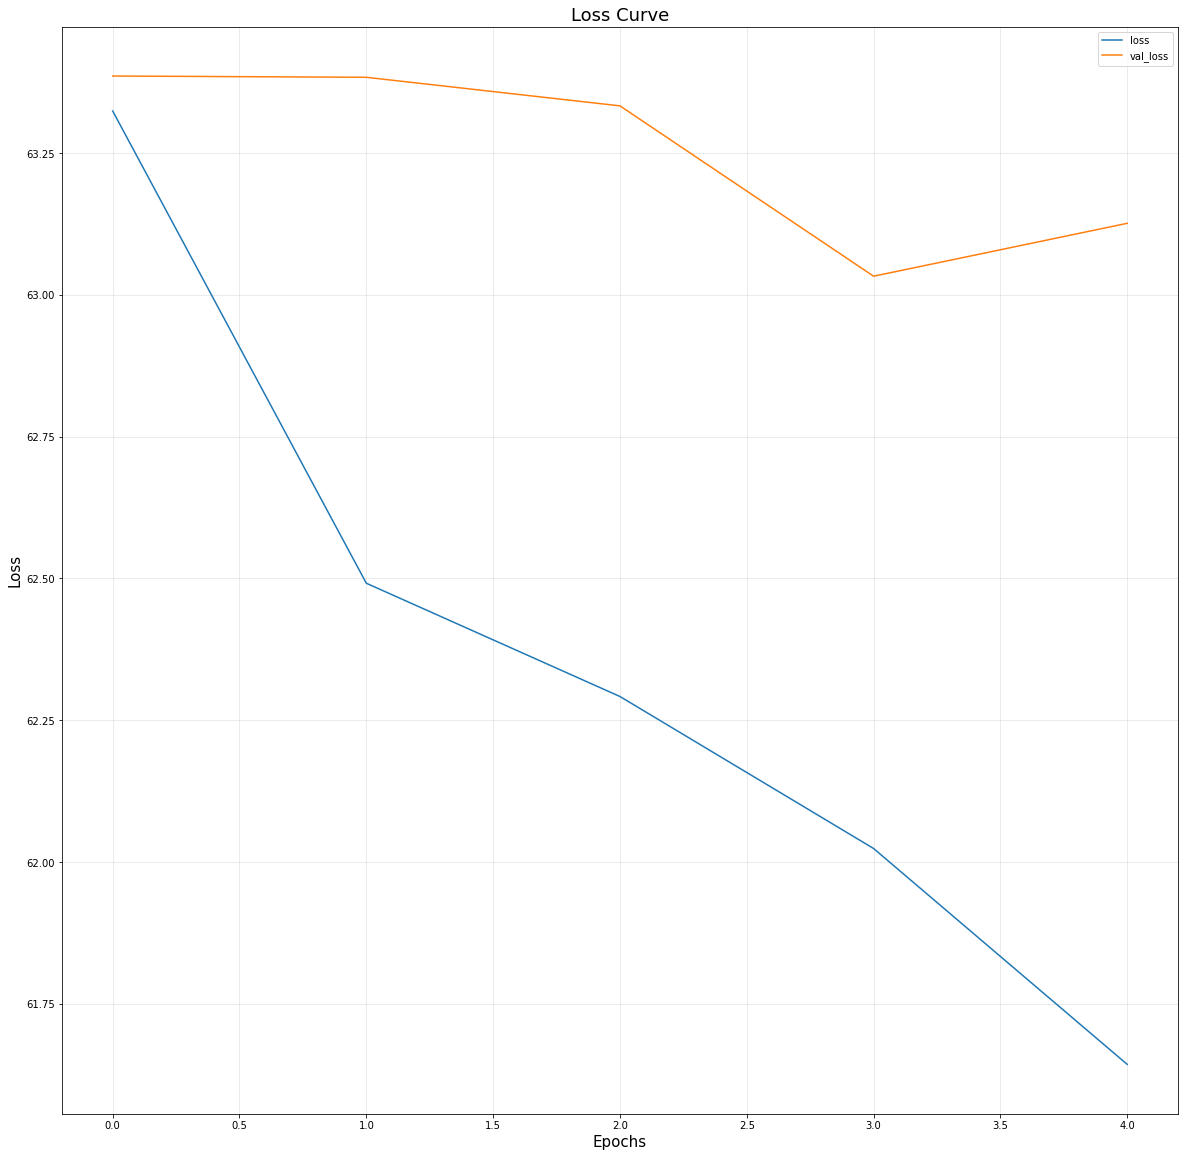

In [27]:
#Deffining figure:
f = plt.figure(figsize = (20, 20))
#Loss curve for the training set
plt.plot(history.epoch,history.history['loss'],label="loss")
#Loss curve for the test set
plt.plot(history.epoch,history.history['val_loss'],label="val_loss")

plt.title("Loss Curve", fontsize = 18)
plt.xlabel("Epochs", fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.grid(alpha = 0.3)
plt.legend()

plt.show()

In [28]:
train_pred = model.predict(X_scaled)

In [30]:
from sklearn.metrics import mean_squared_error
print("RMSE for Neural Network Model",np.sqrt(mean_squared_error(y,train_pred)))

RMSE for Neural Network Model 7.833782600677927


## Predictions

In [31]:
y_pred = model.predict(test_scaled)

In [32]:
sub

,id,loss
0,250000,0
1,250001,0
2,250002,0
3,250003,0
4,250004,0
...,...,...
149995,399995,0
149996,399996,0
149997,399997,0
149998,399998,0


In [33]:
sub['loss'] = y_pred

In [34]:
sub

,id,loss
0,250000,6.969398
1,250001,6.816136
2,250002,7.461396
3,250003,6.006041
4,250004,5.686307
...,...,...
149995,399995,8.690302
149996,399996,7.391614
149997,399997,7.546719
149998,399998,5.901260


In [35]:
sub.to_csv('NN_submission.csv',index=False)

You can use hyperparameter tuning with this network too